En la clase anterior encontramos la siguiente formula para la varianza
de un proceso AR(2):
\begin{eqnarray}
\sigma^2 = \frac{(1 - \phi_2 )\sigma_Z^2}{(1 + \phi_2)(1 - \phi_2 - \phi_1 )(1 - \phi_2 + \phi_1)}
\end{eqnarray}

Es interesante que de esta formula tambien se pueden obtener los criterios de convergencia

$$ \phi_1 + \phi_2 < 1  \quad , \quad \phi_2 - \phi_1 < 1 \quad , \quad | \phi_2 | < 1 $$. La idea es considerar signos y casos. Por ejemplo
$\sigma^2, \sigma_Z^2 > 0$.  Esta en el apendice A.


## ACF: Autocorrelation Function (normalizada). $\gamma$ (no normalizados), $\rho$ (normalizados $\rho_0=1$) estos son los que producen los paquetes de R, Python, etc.

Asumamos $c=0$
$$X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + Z_t $$.
Ya habiamos mostrado:

$\gamma_k = \phi_1 \gamma_{k-1} + \phi_2 \gamma_{k-2} + \mathbb{E}[Z_t X_{t-k}] $.

Tenemos

\begin{eqnarray}
\gamma_0 &=& \sigma^2 ,  \quad , \quad k=0  \\
\gamma_k &=& \phi_1 \gamma_{k-1} + \phi_2 \gamma_{k-2} \quad ,\quad k=1,2, \cdots 
\end{eqnarray}
Usando el backshift 

$$(1 - \phi_1 B - \phi_2 B^2) \gamma_k = 0  $$

Este problema ya lo resolvimos cambiando alla $X_t$ aca $\gamma_t$.

La solucion entonces es:

\begin{eqnarray}
\gamma_0 &=& \sigma^2 = \frac{(1 - \phi_2 )\sigma_Z^2}{(1 + \phi_2)(1 - \phi_2 - \phi_1 )(1 - \phi_2 + \phi_1)} \\
\gamma_1 &=& \frac{\phi_1 \gamma_0}{1 - \phi_2} = \frac{\phi_1 \sigma^2}{1 - \phi_2 } \\
\gamma_2 &=& \sigma^2 \left ( \frac{\phi_1^2 + \phi_2(1 - \phi_2)}{1 - \phi_2}
    \right ) \\
\gamma_k &=& \gamma_{kh0} + \gamma_{kh1} =C_1 \left ( \frac{1}{r_1} \right )^t + C_2 \left ( \frac{1}{r_2}  \right )^t
\end{eqnarray}
con 
$$C_1 = \frac{r_1 ( \gamma_0 - r_2 \gamma_1)}{r_1 - r_2} \quad , \quad C_2 = \frac{r_2 ( r_1 \gamma_1 - \gamma_0) }{r_1 - r_2} $$

Para la funcion de autocorrelacion ACF tenemos que normalizar.

\begin{eqnarray}
\rho_0 &=& 1 \\
\rho_1 &=& \frac{\phi_1}{1 - \phi_2 } \\
\rho_2 &=&  \frac{\phi_1^2 + \phi_2(1 - \phi_2)}{1 - \phi_2} \\
&\vdots & \\
\rho_k &=& \gamma_{kh0} + \gamma_{kh1} = \frac{1}{\sigma^2} C_1 \left ( \frac{1}{r_1} \right )^t + \frac{1}{\sigma^2}  C_2 \left ( \frac{1}{r_2}  \right )^t
\end{eqnarray}

Ejemplo: Ejemplo inestable (no es estacionario).
Considere:

$$ X_t = X_{t-1} + 0.5 X_{t-2} + Z_t $$

Note que $\phi_1 =1 $, $\phi_2=0.5$ y $\phi_1 + \phi_2=1.5$

Comprobemos esto numericamente.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# creamos ruido blanco
np.random.seed(1)
mu, sigma = 0, 1
N=1000
Z=np.random.normal(mu, sigma, N)

phi_1 = 1.0
phi_2 = 0.5

X=np.zeros(N)
X[0]=Z[0]
X[1]=Z[1]

for t in range(2,N):
    X[t] = Z[t] + phi_1*X[t-1] + phi_2 * X[t-2]



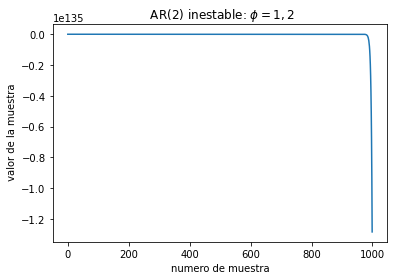

In [ ]:
# grafica
plt.xlabel('numero de muestra')
plt.ylabel(' valor de la muestra')
plt.title(' AR(2) inestable: $\phi=1,2$')
plt.plot(X)
plt.show()

es obvio que el proceso diverge . Estamos hablando de numeros del orden de $10^{135}$

Un modelo estable (estacionario) con dos raices reales.

$$ X_t = 0.7 X_{t-1} + 0.2 X_{t-2} + Z_t $$

$\phi_1=0.7, \phi_2=0.2$.
$\phi_1 + \phi_2 = 0.9 < 1 $. 
$phi_2 - \phi_1 = 0.2 < 1 $, $|\phi_2| = 0.2 < 1$.

Es estable.

Demos dos condicoines iniciales $X_0=1.62$, $X_1=-0.611$.

Encontremos primero la solucion particular:

$$ X_t = 0.7 X_{t-1} + 0.2 X_{t-2} + Z_t$$

Despues la homogenea y por ultimo la completa ($X_p + X_h$)

Para resolver este problema, una vez garantizada la convergencia, debemos encontrar las raices del polinomio caracteristico

$$p(B) = 1 - \phi_1 B - \phi_2 B^2  =1 - 0.7 B - 0.2 B^2 $$

Las raices son:

$$ r_{\pm} = \frac{0.7 \pm \sqrt{0.49 + 0.8}}{-0.4}  $$

De forma que $r_1 = -4.59, r_2 = 1.089



### Problema homogeneo
\begin{eqnarray}
  X_{th} &=& C_1 \left ( \frac{1}{r_1} \right )^t + C_2   
  \left ( \frac{1}{r_2} \right )^t \nonumber \\
  C_1  &=& \frac{r_1 ( X_0 - r_2 X_1 )}{r_1 -r_2}  \quad , \quad 
  C_2 = \frac{r_2(r_1 X_1 - X_0)  }{r_1 - r_2}. 
\end{eqnarray}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
phi_1 = 0.7
phi_2 = 0.2
N=1000
np.random.seed(1)
mu, sigma = 0, 1
N=1000
Z=np.random.normal(mu, sigma, N)

phi_1 = 0.7
phi_2 = 0.2

X=np.zeros(N)
X[0]=Z[0]
X[1]=Z[1]

for t in range(2,N):
    X[t] =  phi_1*X[t-1] + phi_2 * X[t-2]



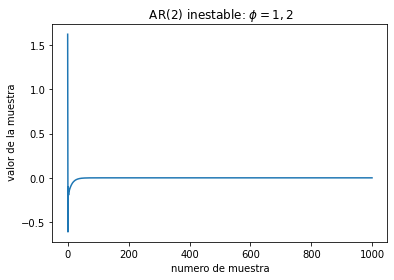

In [ ]:
# grafica
plt.xlabel('numero de muestra')
plt.ylabel(' valor de la muestra')
plt.title(' AR(2) inestable: $\phi=1,2$')
plt.plot(X)
plt.show()

-4.589454172900136 1.0894541729001366


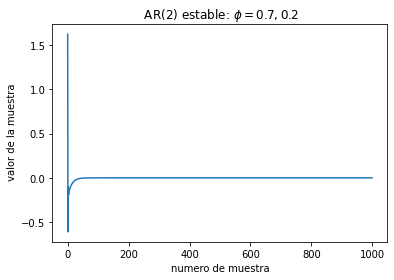

In [ ]:
# implementacion homogenea

N=1000
XH = np.zeros(N)

r1= ( phi_1 + np.sqrt( phi_1**2 + 4*phi_2))/(-2 * phi_2)
r2= ( phi_1 - np.sqrt( phi_1**2 + 4*phi_2))/(-2 * phi_2)
print(r1,r2)

coeff = 1/(r1 - r2) 
XH[0] = X[0]
XH[1] = X[1]
C1 = (r1 *( XH[0] - r2*XH[1]))*coeff
C2 = (r2* (r1*XH[1] - XH[0]))*coeff

for i in range(2, N):
    XH[i] = C1* (1/r1)**i + C2* (1/r2)**i

# grafica
plt.xlabel('numero de muestra')
plt.ylabel(' valor de la muestra')
plt.title(' AR(2) estable: $\phi=0.7,0.2$')
plt.plot(XH)
plt.show()



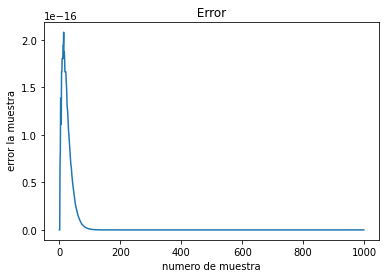

In [ ]:
# grafica
plt.xlabel('numero de muestra')
plt.ylabel(' error la muestra')
plt.title(' Error ')
plt.plot(X-XH)
plt.show()



## Solucion particular
\begin{eqnarray}
  X_0 &=& \frac{1}{r_1 - r_2} (r_1 - r_2) Z_0 = Z_0 \nonumber \\
  X_1 &=& \frac{1}{r_1 - r_2} \left [  (r_1 -r_2) Z_1 + \left (r_1 \frac{1}{r_2}
    - r_2 \frac{1}{r_1} \right ) Z_0
  \right ]  \nonumber \\
  &=& Z_1 + 
  \frac{1}{r_1 - r_2} \left (r_1 \frac{1}{r_2} - r_2 \frac{1}{r_1} \right ) Z_0 \nonumber \\
  &\vdots& \nonumber \\ 
  X_n &=& Z_n + 
  \frac{1}{r_1 - r_2} \left [ \left (r_1 \frac{1}{r_2} - r_2 \frac{1}{r_1} \right ) Z_{n-1}
    + \cdots + 
  \left (r_1 \frac{1}{r_2^n} - r_2 \frac{1}{r_1^n} \right ) Z_{0}  \right ]
\end{eqnarray}




In [ ]:
XP=np.zeros(N)

XP[0]=Z[0]
coeff=1/(r1-r2)

for i in range(1, N):
    XP[i] = Z[i] + coeff*sum( (r1*(1/r2)**(i-j) - r2*(1/r1)**(i-j))*Z[j] \
                             for j in range(i+1))
    


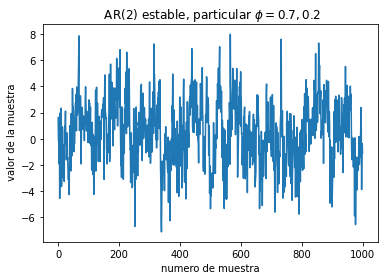

In [ ]:
# grafica
plt.xlabel('numero de muestra')
plt.ylabel(' valor de la muestra')
plt.title(' AR(2) estable, particular $\phi=0.7,0.2$')
plt.plot(XP)
plt.show()

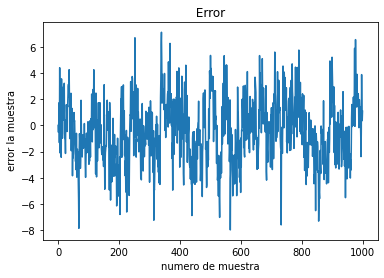

In [ ]:
# grafica
plt.xlabel('numero de muestra')
plt.ylabel(' error la muestra')
plt.title(' Error ')
plt.plot(X-XP)
plt.show()


### AR(2) computo iterativo


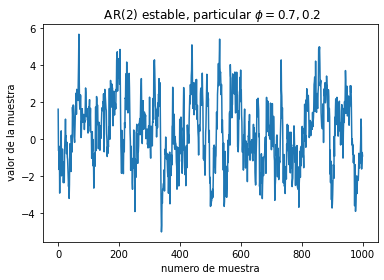

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
phi_1 = 0.7
phi_2 = 0.2
N=1000
np.random.seed(1)
mu, sigma = 0, 1
N=1000
Z=np.random.normal(mu, sigma, N)

phi_1 = 0.7
phi_2 = 0.2

X=np.zeros(N)
X[0]=Z[0]
X[1]=Z[1]

for t in range(2,N):
    X[t] =  phi_1*X[t-1] + phi_2 * X[t-2] + Z[t]

# grafica
plt.xlabel('numero de muestra')
plt.ylabel(' valor de la muestra')
plt.title(' AR(2) estable, particular $\phi=0.7,0.2$')
plt.plot(X)
plt.show()

#### Solucion al problema global $X=XH+XP$.



# recuerde que X= XH + XP
# descanso hasta las 9:15 am

 \begin{eqnarray*}
      X_0 &=&   C_1 +  C_2 + Z_0 \nonumber \\
      X_1 &=& \frac{C_1}{r_1} + \frac{C_2}{r_2} + Z_1 +  \frac{r_1 + r_2}{r_1 r_2} Z_0  \nonumber \\
      &\vdots& \nonumber \\
      X_n &=& C_1 \left ( \frac{1}{r_1} \right ) ^n + C_2  \left ( \frac{1}{r_2} \right )^n
      + Z_n +  \nonumber \\
      &&  \frac{1}{r_1-r_2} \left [ \left ( r_1 \frac{1}{r_2} - r_2 \frac{1}{r_1}  \right ) 
        Z_{n-1} + \cdots +  \left ( r_1 \left ( \frac{1}{r_2} \right)^n - r_2 \left ( \frac{1}{r_1}  
      \right )^n \right ) Z_0 \right ]  \nonumber  \\ \nonumber \\
      C_1 &=& \frac{-r_1 X_0 - r_2 Z_0 + r_1 r_2 X_1 - r_1 r_2 Z_1 }{r_2 - r_1}  \nonumber \\
      C_2 &=& \frac{r_2 X_0 - r_1 r_2 X_1 + r_1 r_2 Z_1 + r_1 Z_0 }{r_2 - r_1} \nonumber \\
      \nonumber \\
    \end{eqnarray*}





In [ ]:
XA = np.zeros(N)
XA[0]=Z[0]
XA[1]=Z[1]
coeff=1/(r1-r2)
C1 = (-r1*XA[0] - r2*Z[0] + r1*r2*XA[1]-r1*r2*Z[1])/(r2-r1)
C2 = (r2*XA[0] - r1*r2*XA[1]  + r1*r2 * Z[1] + r1*Z[0])/(r2-r1)

for i in range(2, N):
    XA[i] = C1*(1/r1)**i + C2*(1/r2)**i + Z[i] + \
    coeff*sum( (r1*(1/r2)**(i-j) - r2*(1/r1)**(i-j))*Z[j] for j in range(i))



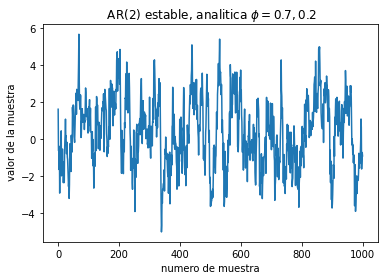

In [ ]:
# grafica
plt.xlabel('numero de muestra')
plt.ylabel(' valor de la muestra')
plt.title(' AR(2) estable, analitica $\phi=0.7,0.2$')
plt.plot(XA)
plt.show()

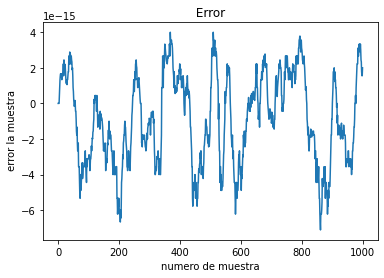

In [ ]:
# grafica
plt.xlabel('numero de muestra')
plt.ylabel(' error la muestra')
plt.title(' Error ')
plt.plot(X-XA)
plt.show()

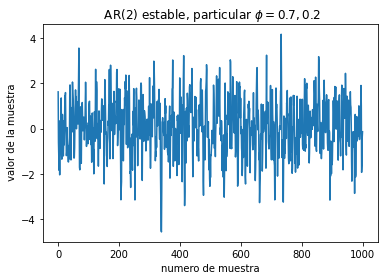

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
phi_1 = 0.7
phi_2 = 0.2
N=1000
np.random.seed(1)
mu, sigma = 0, 1
N=1000
Z=np.random.normal(mu, sigma, N)

phi_1 = 0.7
phi_2 = -0.2

X=np.zeros(N)
X[0]=Z[0]
X[1]=Z[1]

for t in range(2,N):
    X[t] =  phi_1*X[t-1] + phi_2 * X[t-2] + Z[t]

# grafica
plt.xlabel('numero de muestra')
plt.ylabel(' valor de la muestra')
plt.title(' AR(2) estable, particular $\phi=0.7,0.2$')
plt.plot(X)
plt.show()

### representacion complea polar $a+ \mathrm{i} b = \rho \mathrm{e}^{\mathrm{i} \theta}$

 \begin{eqnarray*}
      X_0 &=&  Z_0 \\
      X_1 &=&  Z_1 \\
      &\vdots& \\ 
      X_n &=& -2 \rho^{-n} \cot \theta \sin n  \theta +  Z_n + \\
      && \frac{1}{\rho \sin \theta} \left [   \sin \theta Z_{n-1} + 
        \cdots  + \frac{\sin (k+1) \theta }{\rho^{k-1}} Z_{n-k} + \cdots +
        \frac{\sin(n+1) \theta}{\rho^{n-1}} Z_0 
      \right ] \, ,
    \end{eqnarray*}
with $k=1,2, \cdots, n$.





In [ ]:
# de las notas de clase: $r1=a+ib$, $r2=a-ib$
XA=np.zeros(N)
phi_2=-0.2

a = phi_1/(2* phi_2)
b = -0.5*np.sqrt( -(phi_1)**2  - 4.0*phi_2)/phi_2  

rho = np.sqrt(a**2 + b**2)
theta=np.arctan(b/a)
cot = 1/np.tan(theta)

XA[0]=Z[0]
XA[1]=Z[1]
coeff = 1/(rho*np.sin(theta))

for i  in range(2,N):
    XA[i] = -2*rho**(-i)*cot*np.sin(i*theta) + Z[i] \
    + coeff*sum((( np.sin((j+1)*theta))*(1/rho)**(j-1))*Z[i-j] \
                for j in range(1,i))



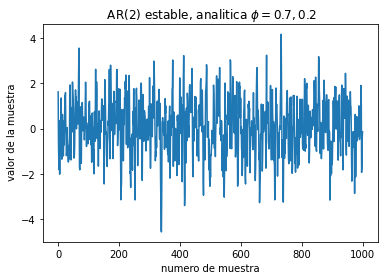

In [ ]:
# grafica
plt.xlabel('numero de muestra')
plt.ylabel(' valor de la muestra')
plt.title(' AR(2) estable, analitica $\phi=0.7,0.2$')
plt.plot(XA)
plt.show()

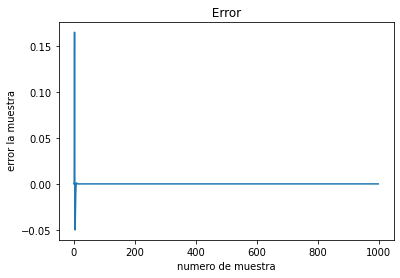

In [ ]:
# grafica
plt.xlabel('numero de muestra')
plt.ylabel(' error la muestra')
plt.title(' Error ')
plt.plot(X-XA)
plt.show()

#### Calculo de la *ACF*
Hay muchas formas de implementar ACF: Son los coeficientes de
Pearson AC coefficient

* El ejercicio de clase al principio del curso
* Usando NumPY (ahorita)
* Usando Statsmodels (mas adelante)
* Hay mas....el algoritmo de arriba (las primeras lineas de la clase de hoy


In [ ]:
# ACF usando NumPY
M=20
temps=X  # salvamos X en una variable temporal
rho2 = np.zeros(M) # inicializacion del vector de ACF
rho2[0]=1

for L in range(1, M):
    tempsL = temps[:-L]  # corte los ultimos L elementos del vector 
    tempspL = temps[L:]

    rho2[L] = np.corrcoef(tempsL, tempspL)[0,1]
    # print(np.corrcoef(tempsL, tempspL))
    

rho2


array([ 1.        ,  0.56944414,  0.19822215,  0.0105072 , -0.01516514,
       -0.02956203, -0.02558106, -0.05299333, -0.0580905 , -0.06049104,
       -0.0561971 , -0.05590162, -0.06814378, -0.03619791, -0.02354536,
       -0.01745773, -0.0359707 , -0.00463775,  0.0241798 ,  0.04224797])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


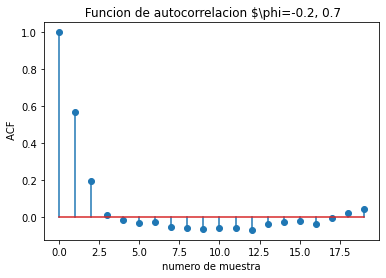

In [ ]:
# grafica
plt.xlabel('numero de muestra')
plt.ylabel(' ACF')
plt.title(' Funcion de autocorrelacion $\phi=-0.2, 0.7')
plt.stem(rho2)
plt.show()

#### ACF Analitica (del principio de la clase de hoy

nan nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


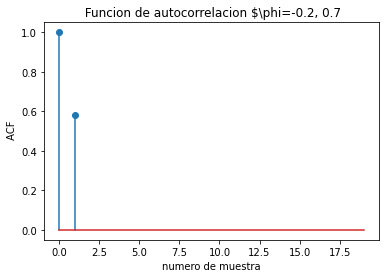

In [ ]:
M=20
phi_1=0.7
phi2=-0.2
rhoa = np.zeros(M)
rhoa[0]=1
rhoa[1]=phi_1/(1 - phi_2)


r1= ( phi_1 + np.sqrt( phi_1**2 + 4*phi_2))/(-2 * phi_2)
r2= ( phi_1 - np.sqrt( phi_1**2 + 4*phi_2))/(-2 * phi_2)
print(r1,r2)

coeff = 1/(r1 - r2) 

C1 = (r1 *( rhoa[0] - r2*rhoa[1]))*coeff
C2 = (r2* (r1*rhoa[1] - rhoa[0]))*coeff

for i in range(2, M):
    rhoa[i] = C1* (1/r1)**i + C2* (1/r2)**i


# grafica
plt.xlabel('numero de muestra')
plt.ylabel(' ACF')
plt.title(' Funcion de autocorrelacion $\phi=-0.2, 0.7')
plt.stem(rhoa)
plt.show()

## ????? tarea para el profesor. Arreglar este problema.






### Yule Walker Equations:
Este el metodo para **invertir**.  Datos los datos extraer de ellos el modelo. En este caso los parametros $\phi_i$.

Esto se pude hacer de varias formas:

*  Con minimos cuadrados (Wiener-Hofp method)
*  Yule-Walker method

$$ X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + Z_t$$

Se hacen autocorrelaciones. Sabemos que el "lag" 0 es $\sigma^2$.

* Lag 1:
\begin{eqnarray}
    X_t X_{t+1} &=& X_t (\phi_1 X_t + \phi_2 X_{t-1} + Z_{t+1} ) 
    &=& \phi_1 X_t X_t + \phi_2 X_t X_{t-1} + X_t Z_{t+1}
\end{eqnarray}

De aca que

\begin{eqnarray}
\gamma_1 &=& \mathbb{E}[X_t X_{t+1}] = \phi_1 \mathbb{E}[X_t X_t] + \phi_2 \mathbb{E}[X_t X_{t-1} ] + \cancel{\mathbb{E}[X_t Z_{t+1}] } \\
&=& \phi_1 \gamma_0 + \phi_2 \gamma_1 
\end{eqnarray}
Dividimos por $\gamma_0=\sigma^2$

\begin{eqnarray}
\rho_1 = \phi_1 \rho_0 + \phi_2 \rho_1 
\end{eqnarray}

Para la segunda ecuacion usamos el

* Lag 2:

\begin{eqnarray}
X_t X_{t+2} = X_t ( \phi_1 X_{t+1} + \phi_2 X_t + Z_{t+2} )
= \phi_1 X_t X_{t+1} + \phi_2 X_t X_t + X_t Z_{t+2}
\end{eqnarray}
Tomamos la esperanza

$$ \gamma_2 = \mathbb{E}[X_t X_{t+2}] = \phi_1 E[X_t X_{t+1}] + \phi_2 \mathbb{E}[X_t X_t] + \cancelto{0}{\mathbb{E}[X_t Z_{t+2}] }  $$

De forma que

$\gamma_2 = \phi_1 \gamma_1 + \phi_2 \gamma_0$

y dividiendo por $\gamma_0=\sigma^2$

obenemos la segunda ecuacion

$$ \rho_2 = \phi_1 \rho_1 + \phi_2 \rho_0$$


Tenemos el sistema:

\begin{eqnarray}
\rho_1 = \phi_1 \rho_0 + \phi_2 \rho_1 \\
\rho_2 = \phi_1 \rho_1 + \phi_2 \rho_0
\end{eqnarray}

En forma matricial

\begin{eqnarray}
\begin{pmatrix}  \rho_0 & \rho_1 \\ \rho_1 & \rho_0 \end{pmatrix} 
\begin{pmatrix} \phi_1 \\ \phi_2 \end{pmatrix} = \begin{pmatrix} \rho_1 \\ \rho_2 \end{pmatrix} 
\end{eqnarray}

Se resuelve este sistema para hallar $\hat{\phi}_1, \hat{\phi}_2$ en terminos de $\rho_1, \rho_2$ que se calculan de los datos con ACF 

